# Задание

'from sklearn.datasets import fetch_lfw_people' <br>
1. Получение данных.
    * Визуализация первых десяти изображений.
3. Кластеризация и оценка качества.
    * Визуализизация центров кластеров.
    * Анализ зависимости метрик от числа кластеров.
4. Снижение размерности признакового пространства.
5. Выводы.

# 0. Загрузка необходимых модулей

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import mglearn

# 1. Получение данных

In [72]:
from sklearn.datasets import fetch_lfw_people

In [74]:
faces = fetch_lfw_people(min_faces_per_person=100, resize=0.4)

# Extract the data and target labels
I = faces.images  # Images in 3D numpy array
X = faces.data  # Image data in a single numpy array
y = faces.target  # Labels for each image
target_names = faces.target_names  # Names of the people
n_classes = target_names.shape[0]  # Number of unique people in the dataset
print(f'Number of unique people in the dataset: {n_classes}')

(_, x_size, y_size) = I.shape

Number of unique people in the dataset: 5


In [75]:
print(faces.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [76]:
I.shape

(1140, 50, 37)

* Визуализация первых десяти картинок

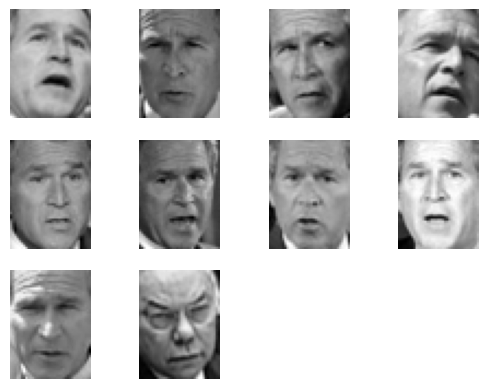

In [58]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(10):
    # Add the image to the figure
    plt.subplot(3, 4, i+1)  # 3 rows, 4 columns, i-th position
    plt.imshow(I[i,:,:], cmap='gray')  
    plt.axis('off')  # Hide the axis labels   
plt.show()

# 2. Кластеризация и оценка качества

In [77]:
# Step 3: Preprocess data using t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Initialize t-SNE
X_embedded = tsne.fit_transform(X)  # Fit and transform the data to 2D

# Step 4: Clustering using K-Means
kmeans = KMeans(n_clusters=n_classes, random_state=42)  # Define KMeans with number of clusters
kmeans_labels = kmeans.fit_predict(X)  # Fit and predict cluster labels

# Step 5: Clustering using Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_classes)  # Define Agglomerative Clustering with number of clusters
agglo_labels = agglo.fit_predict(X)  # Fit and predict cluster labels

# 3. Визуализация 

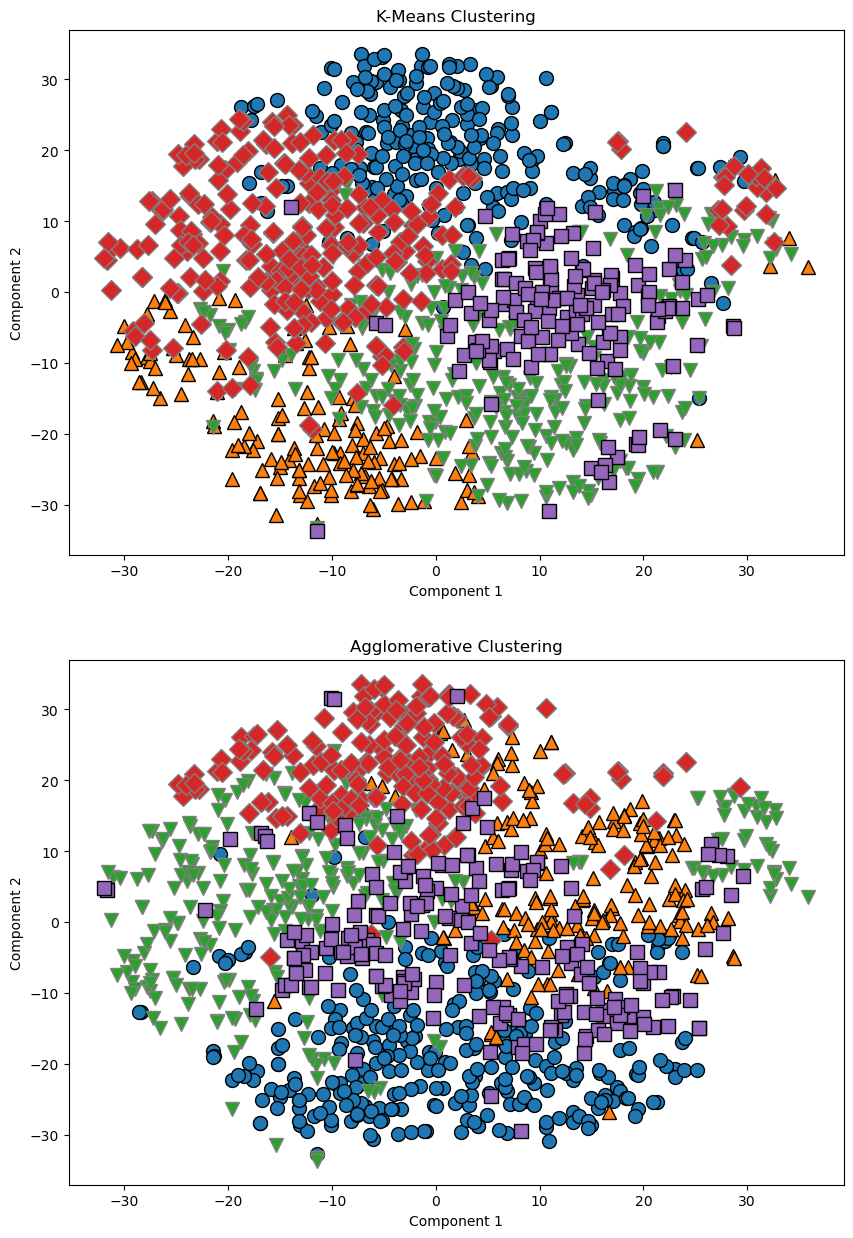

In [82]:
# Step 6: Visualize clusters using mglearn
plt.figure(figsize=(10, 15))

# K-Means Clusters
plt.subplot(2, 1, 1)
mglearn.discrete_scatter(X_embedded[:, 0], X_embedded[:, 1], kmeans.labels_)
plt.title('K-Means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Agglomerative Clustering
plt.subplot(2, 1, 2)
mglearn.discrete_scatter(X_embedded[:, 0], X_embedded[:, 1], agglo.labels_)
plt.title('Agglomerative Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

Центры кластеров

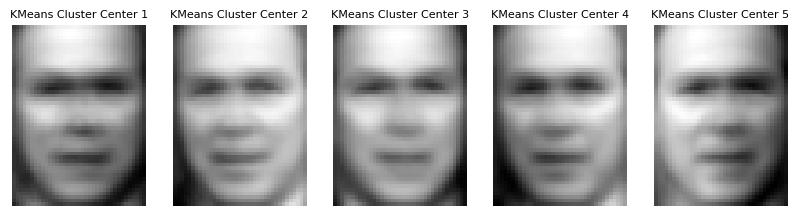

In [86]:
# Step 7: Visualize cluster centers for K-Means
# Visualizing the cluster centers
kmeans_centers = kmeans.cluster_centers_

# Visualize the KMeans cluster centers
fig, axes = plt.subplots(1, n_classes, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(kmeans_centers[i].reshape(x_size, y_size), cmap='gray')  # Reshape to original dimensions
    ax.axis('off')
    ax.set_title(f'KMeans Cluster Center {i + 1}', fontsize=8)
plt.show()

Уменьшение размерности с помощью метода главных компонент.

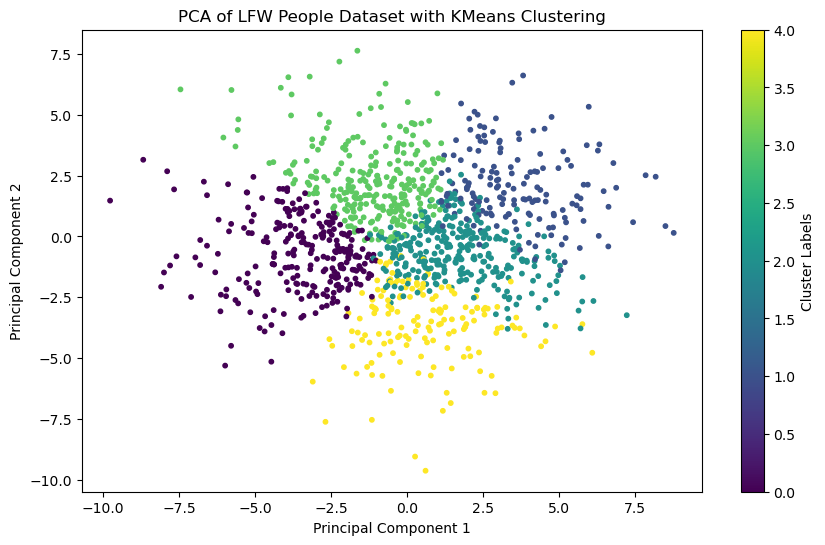

In [88]:
# Step 6: Dimensionality reduction using PCA
# Reducing dimensions for better visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)  # Fit and transform the data

# Visualize PCA-reduced data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('PCA of LFW People Dataset with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Labels')
plt.show()


Метрика silhouette_score

In [87]:
# Step 8: Analysis of silhouette scores
kmeans_score = silhouette_score(X_embedded, kmeans_labels)  # Calculate silhouette score for KMeans
agglo_score = silhouette_score(X_embedded, agglo_labels)  # Calculate silhouette score for Agglomerative Clustering

print("Silhouette Score for KMeans:", kmeans_score)
print("Silhouette Score for Agglomerative Clustering:", agglo_score)

Silhouette Score for KMeans: 0.120233834
Silhouette Score for Agglomerative Clustering: 0.10236755


# Выводы
Проделан кластерный анализ картинок - изображений лиц политиков из датасета fetch_lfw_people библиотеки sklearn.<br>
Использован метод K-means и аггломеративной кластеризации.<br>
Сохранены графики кластеров, полученных указанными методами, с предобработкой с помощью t-SNE (без нее данные оказываются полностью перемешанными)<br>
Получилось, что в нашем случае визуально осмысленность кластеров мало отличается для иерархической кластеризации и алгоритма К средних.<br>
При этом согласно метрике silhouette_score, чуть лучше оказывается метод К-средних.


